# Lab 2: So where do all those reference genomes come from anyway? (Sequence assembly)

This week's exercises consist of two parts:
* **Part 1 (10 pts)**: We'll derive how to estimate the size of a genome based on kmer frequencies using a toy example. In the lab, we'll do this on a real genome.

* **Part 2 (10 pts)**: Review questions to test your understanding of course material.

Reminder: you may work with a partner or consult your classmates or the internet for help on the lab assignments!


# Part 1: Estimating genome size

## 1.1 Intro to kmer counts and coverage

First, let's consider kmers originating from $N$ copies of an example genome ($G$) of length $|G|=15$.

In [10]:
GENOME="ACTCGGCGTTACGCG"

**Question 1 (1 pt)**: How many unique kmers of length 7 can be generated from our genome? Set the variable `num_unique_kmers` to your answer. List the unique kmers in the variable `unique_kmer_list`.

In [11]:
num_unique_kmers = 9
unique_kmer_list = ["ACTCGGC","CTCGGCG", "TCGGCGT", "CGGCGTT", "GGCGTTA", "GCGTTAC", "CGTTACG", "GTTACGC", "TTACGCG"] # Replace with your answer


In [12]:
assert(num_unique_kmers > 1 and num_unique_kmers < len(GENOME))
assert(num_unique_kmers == len(unique_kmer_list))
for val in unique_kmer_list:
    assert(type(val)==str)
    assert(len(val)==7)

**Question 2 (2 pts)**: What would your answer to question 1 (number of unique 7-mers) be for a genome of length 100? 
1000? 1000000?

Complete the function `GetNumUniqueKmers` below to return the number of unique kmers of length $k$ for a genome of size $|G|$. Ignore the possibility that a single kmer may be seen more than once in the genome. 

Notice that, as the genome size gets much bigger than the kmer size, the number of total kmers forms a good approximation to the genome size.

In [13]:
def GetNumUniqueKmers(G, k):
    """Compute the number of unique kmers for a genome of size G
    
    Parameters
    ----------
    G : int
       Size, in bp, of the target genome
    k : int
       Length of the kmer being considered
       
    Returns
    -------
    num_unique_kmers : int
       Number of unique kmers possible
    """
    num_unique_kmers = G-k+1
    # your code here
    return num_unique_kmers

In [14]:
assert(GetNumUniqueKmers(100, 7)==94)
assert(GetNumUniqueKmers(1000000, 7) == 999994)

**Question 3 (1 pt)**: We decide to sequence our genome with 100 reads of length ($L$) 7bp. What will be the average coverage ($C$) of our length 15 genome above? Set the variable `meancov` below to your answer.

Recall that *coverage* refers to the average number of times each base in the genome is sequenced. (see the formula for coverage from last week.)

In [15]:
meancov = 46.67
# your code here

In [16]:
assert(meancov > 10.0 and meancov < 100.0)
assert(type(meancov)==float)

We can also consider the *kmer coverage* ($M$), or the average number of times each *kmer* of a given length is seen. For example, if we have reads of length $L=7$, and are using $k=7$, then we will sequence a single kmer for each read. If we know the total number of possible kmers (your answer to question 2), then we can compute $M$ as the total number of kmers seen divided by the total number of possible kmers. 

**Question 4 (1 pt)**: Continuing our example from question 3, with $N=100$ reads of length $L=7$, $|G|=15$, and $k=7$, what will be the average *kmer coverage*? Set the variable `kmer_cov1` to your answer below.

In [17]:
kmer_cov1 = 11.1

In [18]:
assert(kmer_cov1 > 10 and kmer_cov1 < 20)

**Question 5 (1 pt)**: What about if read length $L=10$? How many kmers of length $k=7$ will we observe per read? What will be the average kmer coverage with 100 reads for a genome of length 15? Set the variable `kmer_cov2` to your answer below.

In [19]:
kmer_cov2 = 44.4


In [20]:
assert(kmer_cov2 > 30 and kmer_cov2 < 50)

Now let's write some code to check our answers.

**Question 6 (4 pts)**: Complete the code below, which generates $N$ reads of length $L$ from an example genome $G$ and plots a histogram of kmer counts for a given kmer length $k$.

You will need to fill in the functions:
* `GetKmersFromReads`: which obtains a list of all kmers of a given length observed in the reads
* `GetMeanKmerCov`: which computes the mean kmer coverage ($M$) based on the read length $L$, kmer size $k$, and number of reads $N$. 

The code will create a histogram of kmer counts. If your result for `GetMeanKmerCov` is correct it should be around the mean value of the histogram.

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


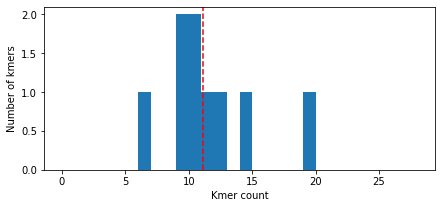

In [21]:
%pylab inline
import numpy as np

GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7

def GetReads(GENOME, N, L):
    """ Return a list of N reads of length L from a GENOME string
    
    Parameters
    ----------
    GENOME : str
       String consisting of the genome sequence
    N : int
       number of reads
    L : int
       length (in bp) of the reads
       
    Returns
    -------
    reads : list of str
       List of reads (consisting of strings of nucleotides)
    """
    reads = []
    for i in range(N):
        start = np.random.randint(0, len(GENOME)-L+1)
        reads.append(GENOME[start:start+L])
    return reads

def GetKmersFromReads(reads, k):
    """ Return a list of all kmers of length k from a list of reads
    
    Parameters
    ----------
    reads : list of str
       List of reads (consisting of strings of nucleotides)
    k : int
       K-mer length

    Returns
    -------
    kmers : list of str
       List of kmers (consisting of strings of nucleotides length k)
    """
    kmers = []
    for read in reads:
        for i in range(len(read)-k+1):
            kmers.append(read[i:i+k])
    return kmers

def GetKmerCounts(kmer_list):
    """ Count the number of times each unique kmer occurs.
    
    Should return a dictionary with kmer_counts[kmer] = number of times the 
    kmer is seen in kmer_list
    
    Parameters
    ----------
    kmer_list : list of str
       List of kmers (consisting of strings of nucleotides length k)
       
    Returns
    -------
    kmer_counts : dict of str->int
       Dictionary indicating the number of times each kmer is seen in kmer_list.
       Key: kmer. Value: number of times seen
    """
    kmer_counts = {}
    for kmer in kmer_list:
        kmer_counts[kmer] = kmer_counts.get(kmer, 0) + 1
    return kmer_counts

def GetMeanKmerCov(GENOME, N, k, L):
    """Compute the mean kmer coverage of a genome
    
    Parameters
    ----------
    GENOME : str
       String consisting of the genome sequence
    N : int
       number of reads
    k : int
       K-mer length
    L : int
       length (in bp) of the reads

    Returns
    -------
    mean_kmer_cov : float
       Mean number of times each kmer is seen
    """
    num_kmers_seq = 0 # Set this below
    num_kmers_uniq = -1 # Set this below
    # Set num_kmers_seq and num_kmers_uniq based on the formulas above
    # num_kmers_seq is the total number of kmers sequenced
    # num_kmers_uniq is the number of unique kmers in GENOME (assuming all are unique)
    # your code here
    num_kmers_uniq = len(GENOME)-k+1
    num_kmers_seq = (L-k+1)*N
    mean_kmer_cov = num_kmers_seq*1.0/num_kmers_uniq
    return mean_kmer_cov

def PlotKmerHist(kmer_counts, meanval=None):
    """ Plot a histogram of kmer counts
    
    Returns a plot where the x-axis is kmer count, and the y-axis
    is the number of kmers seen that many times.
    
    Parameters
    ----------
    kmer_counts : dict of str->int
       Dictionary indicating the number of times each kmer is seen in kmer_list.
       Key: kmer. Value: number of times seen
    meanval : float (optional)
       Mean kmer coverage value
    """
    fig = plt.figure()
    fig.set_size_inches((7, 3))
    ax = fig.add_subplot(111)
    vals = list(kmer_counts.values())
    bins = np.arange(0, max(vals)*1.5, 1)
    ax.hist(vals, bins=bins)
    if meanval is not None: ax.axvline(x=meanval, linestyle="dashed", color="red")
    ax.set_xlabel("Kmer count")
    ax.set_ylabel("Number of kmers")
    
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

In [24]:
"""Test GetKmersFromReads"""
GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
assert(len(kmer_list)==N)

k = 7
N = 100
L = 10
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)

In [25]:
"""Test GetMeanKmerCov"""
GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7

k = 5
N = 1000
L = 10

Now let's take a look at kmer histograms for larger genomes to get a feel for what this will look like in real data. Play around with the parameters in the cell below and see how they affect the histograms. You can also use this to make sure your estimate fo the mean kmer coverage is correct.

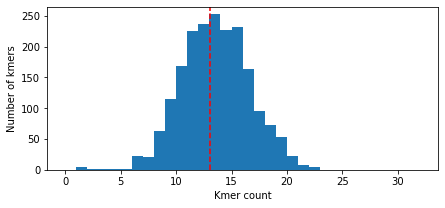

In [26]:
# Generate a random genome of 1kb
nucs = ["A","C","G","T"]
genome_size = 2000
GENOME = ''.join([nucs[np.random.randint(0, 4)] for  i in range(genome_size)])

# Set real-world kmer size and read length
k = 11
L = 36
N = 1000

reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

## 1.2. Estimating genome size from kmer histograms

We'd like to be able to estimate the size of a genome just based on the observed reads. It turns out we can leverage kmer histograms to solve this problem.

After completing the exercise above, we now know how to compute *kmer coverage* ($M$: average number of times each kmer is seen) and *sequencing coverage* ($C$: average number of times each base pair is sequenced) as a function of:

* $G$: the size of the genome
* $N$: the number of reads
* $L$: the length of the read
* $k$: the size of the kmer

Rearrange your formula for kmer coverage ($M$) to solve for $G$. Note, since in most settings $G-k+1$ is very close to $G$, you can replace wherever that term occurs in your formula with $G$ to simplify. That is, assume $G-k+1 \approx G$.

**Question 7 (1 pt)**: Complete the function `GetGenomeSize` below which computes genome size $G$ as a function of number of reads ($N$), read length ($L$), kmer size ($k$), and observed peak location in the kmer histogram ($M$) based on the formula you derive.

Based on the observed kmer histogram above (for a genome of length 1000 with kmer size 10 and 1,000 reads of length 36), you should hopefully see a peak for $M$ around 25-30. If your formula is correct, you should estimate the genome size to be 900-1,080 which is pretty close to the true size of 1,000.

In [27]:
def GetGenomeSize(N, k, L, M):
    """ Estimate the size of a genome based on observed reads
    
    Parameters
    ----------
    N : int
       number of reads
    k : int
       K-mer length
    L : int
       length (in bp) of the reads
    M : float
       Estimated mean kmer coverage.
       
    Return
    ------
    est_genome_size : int
       Estimated genome size (in bp)
    """
    est_genome_size = N*(L-k+1)/ M
    return int(est_genome_size)

In [28]:
N = 1000
L = 36
k = 10
M = 30
assert(GetGenomeSize(N, k, L, M)==900)
M = 25
assert(GetGenomeSize(N, k, L, M)==1080)

## 1.3. Kmer histograms for real data

In real data, our kmer histograms get slightly more complicated since we have sequencing errors. 

**Question 8 (1 pt)**: Modify the code below to introduce random errors into your reads at a rate of 0.1%.

If your answer is correct, you should see a huge spike of unique kmers (at count=1) due to sequencing errors. In practice, to account for errors in our genome size estimation, instead of using $N$, $L$, and $k$ to compute the total number of kmers sequenced, we will instead add up all the kmers seen after chopping off the kmers with low counts that are likely due to errors. We will explore this more using real data in the lab assignment.

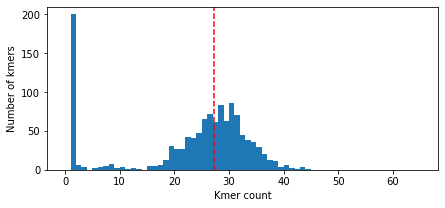

In [29]:
nucs = ["A","C","G","T"]
genome_size = 1000
GENOME = ''.join([nucs[np.random.randint(0, 4)] for  i in range(genome_size)])

# Set real-world kmer size and read length
k = 10
L = 36
N = 1000
error_rate = 0.001

def GetReadsWithErrors(GENOME, N, L, error_rate):
    """ Return a list of N reads of length L from a GENOME string
    
    Generate random errors with probability error_rate 
    
    Parameters
    ----------
    GENOME : str
       String consisting of the genome sequence
    N : int
       number of reads
    L : int
       length (in bp) of the reads
    error_rate : float
       The probability that each base is incorrect.
       
    Returns
    -------
    reads : list of str
       List of reads (consisting of strings of nucleotides)
    """
    reads = []
    for i in range(N):
        start = np.random.randint(0, len(GENOME)-L+1)
        read = GENOME[start:start+L]
        readlist = list(read)
        for i in range(len(readlist)):
            if random.random() < 0.001:
                bases  = ['A', 'C', 'G', 'T']
                randomletter = random.choice(bases)
                readlist[i]=randomletter
        R = ''.join(readlist)
        reads.append(R)
    return reads

reads = GetReadsWithErrors(GENOME, N, L, error_rate)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

In [31]:
"""Check that there are many kmers with count 1"""
GENOME = ''.join([nucs[np.random.randint(0, 4)] for  i in range(genome_size)])
k = 10
L = 36
N = 1000
error_rate = 0.001
reads = GetReadsWithErrors(GENOME, N, L, error_rate)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
assert(len(reads) == N)
assert(len([item for item in kmer_counts if kmer_counts[item]==1])> 50) # There is an infinitesimal chance this will fail

# Part 2: Review questions

**Question 1 (1 pt)**: You sequence a human genome (3 billion bp) with 2 billion single end reads of 101bp each. What do you expect the average *sequencing coverage* to be? Set the variable `meancov` below to your answer.

In [1]:
meancov = 67
# Set meancov to the average sequencing coverage
# your code here

In [3]:
"""Check that meancov is set to the correct answer"""

'Check that meancov is set to the correct answer'

**Question 2 (1 pt):** You are analyzing sequencing data of a human (which is diploid) at a position where the individual is *heterozygous* for the reference base ("A") and an alternate ("T") base. If the position was covered by 5 reads, in the absence of sequencing errors, what is the probability of seeing 0 reads with the alternate "T" base in that position? Set the variable `prob0` below.

In [5]:
import scipy.special
# Recall scipy.special.comb(N, k) gives "N choose k" which
# is helpful for computing binomial probabilities
# Or you could also do the math manually and just set prob0
# to your answer

prob0 = 1/scipy.special.comb(5,0)*0.5**5
print (prob0)
# Set prob0 below to answer question 2
# your code here

0.03125


In [6]:
"""Check prob0 set correctly"""
assert(prob0 >= 0 and prob0 <= 1)

**Question 3 (1 pt)**: You sequence a single fragment of DNA with 2x101bp paired-end Illumina reads. After aligning your reads to the genome, the first (forward) read maps to chr6:10000 and the second read maps to chr6:10400 (Note: those are the start, or left-most, coordinates of each read). What is the estimated length of the fragment based on where the reads map? Set `fraglen` to your answer below.

In [8]:
fraglen = 501
# Set fraglen to your answer below
# your code here

In [9]:
"""Check the value of fraglen"""
assert(fraglen > 500 and fraglen < 2000)

**Question 4 (1 pt):** You sequence a genome of length 1 billion using 3 billion single end reads of length 36bp. Using kmers of length 31, how many times do you expect to see each kmer in your data? (i.e. what is the mean *kmer coverage*)? Set your answer in the variable `kmercov` below.

In [10]:
kmercov = 18
# Set kmercov to your answer below
# your code here

In [11]:
"""Check the value of kmercov"""
assert(kmercov > 0 and kmercov < 100000)

**Question 5 (1 pt)**: Write a UNIX command to get the filesize in human readable format (e.g. number of megabytes, gigabytes, etc.) of the file `test.fq` (included in this directory). Set the variable `cmd` to your command below. Hint: you can test UNIX commands either in the terminal, or by putting `!` before your command in a Jupyter notebook cell.

In [32]:
cmd = 'ls -lh test.fq'
# Set cmd to get the filesize in human readable format for test.fq
# your code here

In [33]:
"""Check that the command gives the file size"""
from subprocess import Popen, PIPE
p = Popen(cmd, shell=True, stdout=PIPE, stderr=PIPE)
out, err = p.communicate()
assert(p.returncode == 0)
assert("1." in str(out))
assert("K" in str(out))

**Question 6 (1 pt)**: Write a one line UNIX command that outputs the part of `test.fq` corresponding to reads 3-5. Remember each read encompasses 4 lines of data. Your solution should involve "piping" two commands together. e.g. `command1 | command2...`. Set the variable `cmd` to your command below.

In [18]:
cmd = 'head -n 20 test.fq| tail -n 12 test.fq'
# your code here

In [19]:
"""Check that the command gives the correct lines"""
from subprocess import Popen, PIPE
p = Popen(cmd, shell=True, stdout=PIPE, stderr=PIPE)
out, err = p.communicate()
assert(p.returncode == 0)
assert(len(str(out).strip().split("\\n")[:-1])==12) # Note there is an extra "'" at the end. better way to write this test?

**Question 7 (1 pt)**: Write a UNIX command to print out the first five occurrences of the string ">chr" in the file `~/public/genomes/hg19.fa`. Set the variable `cmd` to your command below.

In [22]:
cmd = "grep '>chr' ~/public/genomes/hg19.fa | head -n 5"
# Set cmd to print out the first five occurrences of the string ">chr" 
# in the file `~/public/genomes/hg19.fa`
# your code here

In [23]:
"""Check that the command gives the correct output"""
from subprocess import Popen, PIPE
p = Popen(cmd, shell=True, stdout=PIPE, stderr=PIPE)
out, err = p.communicate()
assert(p.returncode == 0)
assert(len(str(out).split("\\n")[:-1])==5)
assert(">chr1" in str(out))
assert(">chr2" in str(out))
assert(">chr3" in str(out))
assert(">chr4" in str(out))
assert(">chr5" in str(out))